In [48]:
import matplotlib as mpl
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t = 0.0
sigma0 = 0.5
deltax = 0.04
k0 = 17*np.pi 
deltat = 0.5*deltax*deltax
xmax = 6.0
alpha = 0.5*deltat*(deltax*deltax)

xs = np.arange( -xmax, xmax + deltax/2.0, deltax)

psi = np.zeros((301,2))

psr = np.zeros((301,2))

rho = np.zeros(301)

psi[:,1]=(np.exp(-0.5*np.power((xs-5)/sigma0,2))*np.sin(k0*xs))
psr[:,1]=(np.exp(-0.5*np.power((xs-5)/sigma0,2))*np.cos(k0*xs))

v=15.0*np.power(xs,2)

#    def v(xs):
#        if xs <0 or xs>15:
 #           v[xs] = np.infty()
  #      else:
   #         v[xs] = 0
    
    


for paso in range(5000):
    t = t + (0.5*deltat)
   
    psi[:,0] = psi[:,1]
    psr[:,0] = psr[:,1]

    if paso%2 == 0:

        psr[0,1] = psr[0,0] - 2*(alpha*(psi[1,0]) - 2*(alpha + v[0]*deltat)*psi[0,0])
        psr[1:-1,1] = psr[1:-1,0] - 2*(alpha*(psi[2:,0]+psi[0:-2,0]) - 2*(alpha + v[0]*deltat)*psi[1:-1,0])
        psr[-1:,1] = psr[-1:,0] - 2*(alpha*(psi[-2:-1,0]) - 2*(alpha + v[0]*deltat)*psi[-1:,0])
        rho = np.power(psr[:,0],2)+psi[:,1]*psi[:,-1]
    else:                         
        psi[0,1] = psi[0,0] + 2*(alpha*(psr[1,0]) - 2*(alpha + v[0]*deltat)*psr[0,0])
        psi[1:-1,1] = psi[1:-1,0] + 2*(alpha*(psr[2:,0]+psr[0:-2,0]) - 2*(alpha + v[0]*deltat)*psr[1:-1,0])
        psi[-1:,1] = psi[-1:,0] + 2*(alpha*(psr[-2:-1,0]) - 2*(alpha + v[0]*deltat)*psr[-1:,0])
        rho = np.power(psi[:,0],2)+psr[:,1]*psr[:,-1]

    if paso%200== 0:
        print(rho)


plt.show()

[6.33097734e-211 2.12523936e-209 7.04345870e-208 2.30465077e-206
 7.44501041e-205 2.37446911e-203 7.47667956e-202 2.32429926e-200
 7.13372477e-199 2.16163163e-197 6.46677951e-196 1.91000917e-194
 5.56959838e-193 1.60344231e-191 4.55747011e-190 1.27889635e-188
 3.54313663e-187 9.69128761e-186 2.61707455e-184 6.97736974e-183
 1.83657391e-181 4.77272175e-180 1.22451709e-178 3.10173447e-177
 7.75685033e-176 1.91516960e-174 4.66842188e-173 1.12350235e-171
 2.66943225e-170 6.26188161e-169 1.45021313e-167 3.31588792e-166
 7.48529436e-165 1.66824163e-163 3.67070986e-162 7.97410943e-161
 1.71023329e-159 3.62134206e-158 7.57050367e-157 1.56250361e-155
 3.18389191e-154 6.40525808e-153 1.27220173e-151 2.49468869e-150
 4.82967345e-149 9.23124350e-148 1.74198206e-146 3.24539959e-145
 5.96944161e-144 1.08402743e-142 1.94351485e-141 3.44014293e-140
 6.01182237e-139 1.03723419e-137 1.76680468e-136 2.97126431e-135
 4.93327201e-134 8.08667276e-133 1.30871689e-131 2.09104113e-130
 3.29853027e-129 5.137116

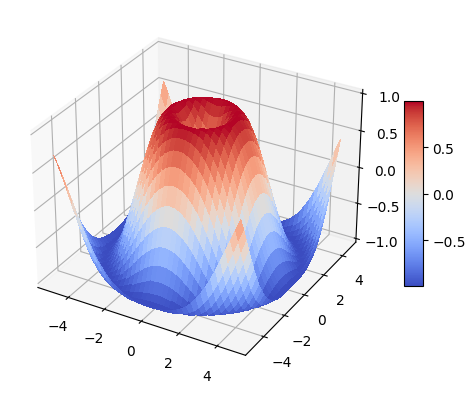

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

# Figura
fig = plt.figure()

# Tomo el eje actual y defino una proyección 3D
ax = fig.add_subplot(111, projection='3d')

# Dibujo 3D
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

# el metodo meshgrid devuelve una matriz de coordenadas
# a partir de vectores de coordendas, que usamos para
# los datos del eje Z
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Grafico surface en 3D
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Límites del eje Z
ax.set_zlim(-1.01, 1.01)

# Barra de nivel, un poco más pequeña
fig.colorbar(surface, shrink=0.5, aspect=10)


##Animacion.

ValueError: Argument Z must be 2-dimensional.

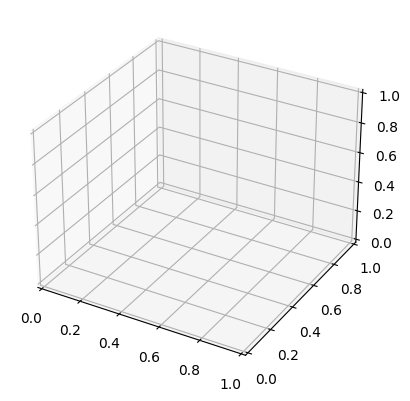

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and an axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D mesh
x, y, z = np.meshgrid(xs, t, rho)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis')

# Create an animation
def animate(i):
    # Update the rho function
    rho = np.sqrt(np.power(psi[:,0],2) + np.power(psr[:,0],2))

    # Plot the rho function
    ax.plot_surface(x, y, rho, rstride=1, cstride=1, cmap='viridis')

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20)

# Show the animation
plt.show()
#    if paso%2 != 0:
 #       psr[1:-1,2] = psr[1:-1,1] - 2*(alpha*(psi[2:,1]+psi[0:-2,1]) - 2*(alpha + v*deltat)*psi[1:-1,1])
  #      rho = np.power(psr[:,1],2)+psi[:,2]*psi[:,0]
   # else:
    #    psi[:,2] = psi[:,1] + 2*(alpha*(psr[2:1,1]+psr[-1:-2,1]) - 2*(alpha + v*deltat)*psr[-1:-2,1])
     #   rho = np.power(psi[:,1],2)+psr[:,2]*psr[:,0]
    
 
#rho = np.sqrt(np.power(psi[:,0],2) + np.power(psr[:,0],2))
#def rho(psi,psr):
#
 #   for step in range(200):
  #      t = t + (0.5*deltat)*100
#
 #       psi[:,0] = psi[:,1]
  #      psr[:,0] = psr[:,1]
   #     if t%10 == 0:
    #        
     #   else:
      #      
   # return rho

#if paso%2 == 0:
#    psr[1:-1,2] = psr[1:-1,1] - 2*(alpha*(psi[2:,1]+psi[0:-2,1]) - 2*(alpha + v*deltat)*psi[1:-1,1])
#    rho = np.power(psr[:,1],2)+psi[:,2]*psi[:,0]
#else:
#    psi[1:-1,2] = psi[1:-1,1] + 2*(alpha*(psr[2:,1]+psr[0:-2,1]) - 2*(alpha + v*deltat)*psr[1:-1,1])
#    rho = np.power(psi[:,1],2)+psr[:,2]*psr[:,0]

NameError: name 'f' is not defined

Error in callback <function _draw_all_if_interactive at 0x7f8395f9ed40> (for post_execute):


ValueError: list.remove(x): x not in list

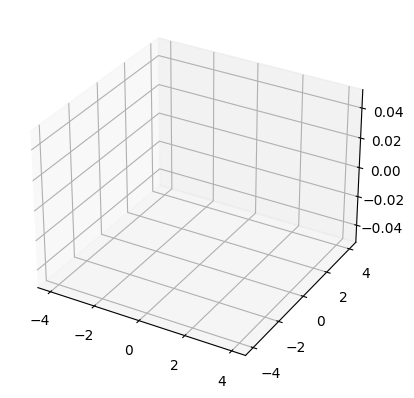

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

fps=20
frn= fps*6
N = 200

x = np.linspace(-4,4,N+1)
X,Y = np.meshgrid(x,x)
z = np.zeros((N+1,N+1,frn))

def animate(i,z,plot):
    plot[0].remove()
    z[:,:,i] = f(rho,xs,t)
    plot[0]=ax.plot_surface(X,Y,z[:,:,i],cmap='magma')

plot = [ax.plot_surface(X,Y,z[:,:,0])]
ani = animation.FuncAnimation(fig, animate, frames=frn, fargs=(z,plot), interval=1000/fps)
ani.save('densidad3d.gif',fps=fps)
#ani.save('wave-packet.gif','gif')
plt.show()
# -
# ## 3D animation with matplotlib
#
# The following code is a 3D animation of the function $f(x,y,z) = \rho \sin(2\pi i)$.
#
# The animation is created using the `FuncAnimation` class from the `matplotlib.animation` module.
#
# The function `animate` is called at each frame of the animation.
#
# The argument `i` is the frame number.
#
# The argument `z` is a 3D array containing the values of the function at each frame.
#
# The argument `plot` is a list containing the plot object.
#

    

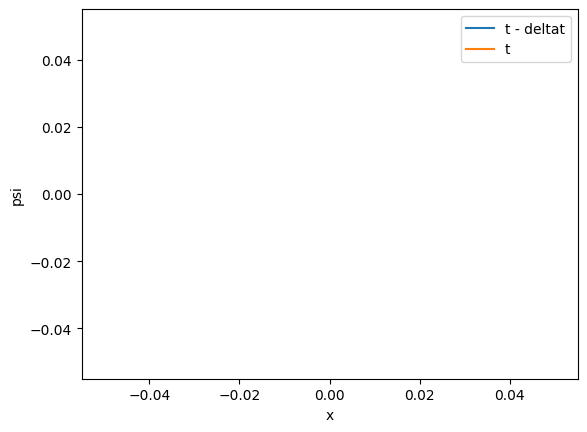

In [ ]:
import matplotlib.pyplot as plt

# Representar psi en t - deltat
plt.plot(xs, psi[:,0], label='t - deltat')

# Representar psi en t
plt.plot(xs, psi[:,1], label='t')

# Representar psi en t + deltat
#plt.plot(xs, psi[:,2], label='t + deltat')

plt.xlabel('x')
plt.ylabel('psi')
plt.legend()
plt.show()
